# Swiggity Swooty @the PUBG Booty

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

C:\Users\Jordan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
training_data_filepath='C:/Users/Jordan/Desktop/PUBG Data/train.csv'
training=pd.read_csv(training_data_filepath)

# EDA

In [55]:
#Are any vectors missing values? Nope
training.isnull().values.any()

False

In [71]:
var_list=list(training)

for varz in var_list:
    print(varz)
    print(training[varz].describe().round(2))
    print("\n")

Id
count    4357336.00
mean     3102678.01
std      1797477.32
min            0.00
25%      1537745.75
50%      3110605.50
75%      4657295.25
max      6224522.00
Name: Id, dtype: float64


groupId
count    4357336.00
mean     1024776.56
std       696719.69
min            1.00
25%       474137.75
50%       943032.00
75%      1418544.00
max      2700605.00
Name: groupId, dtype: float64


matchId
count    4357336.00
mean       23855.39
std        13782.27
min            0.00
25%        11914.00
50%        23837.00
75%        35801.00
max        47733.00
Name: matchId, dtype: float64


assists
count    4357336.00
mean           0.27
std            0.63
min            0.00
25%            0.00
50%            0.00
75%            0.00
max           20.00
Name: assists, dtype: float64


boosts
count    4357336.00
mean           0.96
std            1.56
min            0.00
25%            0.00
50%            0.00
75%            1.00
max           18.00
Name: boosts, dtype: float64


damageDealt


In [8]:
corr_matrix=training.corr(method='pearson')

In [51]:
#Higher positive correlation means value goes up as winPlacePerc does
#Negative correlation means value goes up and winPlacePerc goes down (or lower values mean higher winPlacePerc)
corr_matrix['winPlacePerc'].sort_values()

killPlace         -0.708314
Id                -0.018157
teamKills         -0.006122
groupId           -0.000239
matchId            0.000423
roadKills          0.028879
maxPlace           0.034235
numGroups          0.035831
vehicleDestroys    0.057700
killPoints         0.090293
swimDistance       0.154889
winPoints          0.170407
revives            0.251399
headshotKills      0.278705
DBNOs              0.279475
rideDistance       0.301220
assists            0.304642
killStreaks        0.372546
longestKill        0.405800
kills              0.415350
heals              0.427986
damageDealt        0.438552
weaponsAcquired    0.571521
boosts             0.618075
walkDistance       0.811857
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

In [32]:
training[training["matchId"]==11914].sort_values(by='winPlacePerc')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
59648,80106,85707,11914,0,0,46.77,1,0,0,46,...,1,0.00,0,4.91,0,0,162.30,1,1471,0.0000
107381,148296,85707,11914,1,0,100.00,1,1,0,48,...,0,0.00,0,0.00,0,0,54.56,2,1500,0.0000
155114,216486,85707,11914,1,0,153.20,1,0,0,47,...,0,0.00,0,0.00,0,0,70.71,1,1474,0.0000
2232439,3184380,85707,11914,0,0,53.90,0,0,0,97,...,0,0.00,0,0.00,0,0,22.32,2,1494,0.0000
2045789,2917687,85707,11914,0,0,0.00,0,0,0,98,...,0,0.00,0,0.00,0,0,16.39,1,1490,0.0000
2279061,3250996,85705,11914,0,0,58.80,0,0,0,95,...,0,0.00,0,0.00,0,0,64.25,4,1464,0.0345
3207495,4577172,85705,11914,0,0,0.00,0,0,0,96,...,0,0.00,0,0.00,0,0,44.63,1,1500,0.0345
631880,897598,85705,11914,0,0,0.00,0,0,0,94,...,0,0.00,0,0.00,0,0,298.60,1,1535,0.0345
536770,761721,85705,11914,0,0,174.80,1,1,1,45,...,0,0.00,0,0.00,0,0,113.90,3,1513,0.0345
584348,829690,85705,11914,0,0,100.00,1,0,0,44,...,0,0.00,0,0.00,0,0,66.55,2,1517,0.0345


In [64]:
def reg(dataz,model_type,equation):
    if model_type=="ols":
        results = smf.ols(equation,data=dataz).fit(cov_type="HC0")
    elif model_type=="logit":
        results = smf.logit(equation,data=dataz).fit()
    print(results.summary())
    
reg(training,"ols","winPlacePerc ~ walkDistance + kills + winPoints + heals + DBNOs")

                            OLS Regression Results                            
Dep. Variable:           winPlacePerc   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 1.018e+06
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:38:58   Log-Likelihood:             1.4474e+06
No. Observations:             4357336   AIC:                        -2.895e+06
Df Residuals:                 4357330   BIC:                        -2.895e+06
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3270      0.003   -124.108   

# Grouping Teams
This section creates averages from team data

In [89]:
new_list=var_list.copy()
new_list.remove('Id')
new_list.remove('vehicleDestroys')
new_list.remove('longestKill')

team_dataz=training[new_list].groupby('groupId').agg(['mean','count'])
#team_dataz=team_dataz.drop(['Id','groupId'])

In [91]:
team_dataz.round(2).stack()

matchId  assists  boosts  damageDealt  DBNOs  headshotKills  \
groupId                                                                      
1       mean         0     0.33    1.67       391.33   2.33           0.33   
        count        3     3.00    3.00         3.00   3.00           3.00   
2       mean         0     0.00    0.33        29.96   0.00           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
3       mean         0     1.00    2.00        19.54   0.00           0.00   
        count        1     1.00    1.00         1.00   1.00           1.00   
4       mean         0     1.00    3.00       229.40   1.00           0.00   
        count        1     1.00    1.00         1.00   1.00           1.00   
5       mean         0     0.33    0.67        87.13   0.33           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
6       mean         0     0.33    1.33       156.72   1.33           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
7       mean         0     0.00    0.00         0.00   0.00           0.00   
        count        1     1.00    1.00         1.00   1.00           1.00   
8       mean         0     1.00    0.25       155.23   1.00           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
9       mean         0     0.00    0.50        30.66   0.25           0.00   
        count        4     4.00    4.00         4.00   4.00           4.00   
10      mean         0     0.14    0.00        55.89   0.43           0.14   
        count        7     7.00    7.00         7.00   7.00           7.00   
11      mean         0     0.50    3.00       184.10   0.75           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
12      mean         0     0.67    0.67       191.96   1.67           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
13      mean         0     0.33    0.33       140.63   0.67           0.00   
        count        3     3.00    3.00         3.00   3.00           3.00   
14      mean         0     0.17    0.00        58.38   0.17           0.00   
        count        6     6.00    6.00         6.00   6.00           6.00   
15      mean         0     0.00    0.00       111.70   1.00           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
...                ...      ...     ...          ...    ...            ...   
2700591 mean         9     0.00    0.25       169.76   1.25           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
2700592 mean         9     0.67    1.33       245.50   1.67           0.67   
        count        3     3.00    3.00         3.00   3.00           3.00   
2700593 mean         9     0.00    0.40       108.47   1.20           0.00   
        count        5     5.00    5.00         5.00   5.00           5.00   
2700594 mean         9     0.50    0.00        90.15   0.75           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
2700595 mean         9     0.17    0.17        74.38   0.67           0.33   
        count        6     6.00    6.00         6.00   6.00           6.00   
2700596 mean         9     0.00    0.25        81.82   0.75           0.25   
        count        4     4.00    4.00         4.00   4.00           4.00   
2700597 mean         9     0.00    0.40        73.49   0.20           0.00   
        count        5     5.00    5.00         5.00   5.00           5.00   
2700598 mean         9     0.00    0.00        38.17   0.23           0.15   
        count       13    13.00   13.00        13.00  13.00          13.00   
2700599 mean         9     0.50    3.00       136.68   1.00           0.00   
        count        4     4.00    4.00         4.00   4.00           4.00   
2700600 mean         9     0.25    2.

# Kills

(array([ 2464072.,   916170.,   465632.,   229589.,   122488.,    65929.,
           37406.,    21820.,    12941.,     7809.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

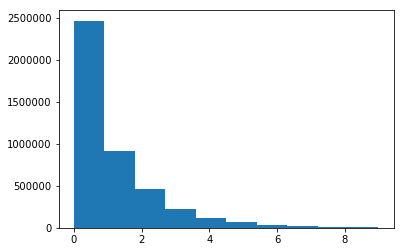

In [7]:
plt.hist(training['kills'][training['kills']<10])

In [9]:
corr_matrix['kills'].sort_values()

killPlace         -0.728624
Id                -0.031724
maxPlace          -0.010540
numGroups         -0.010505
groupId            0.000635
matchId            0.000907
teamKills          0.020235
swimDistance       0.043965
vehicleDestroys    0.057463
roadKills          0.060371
winPoints          0.095461
rideDistance       0.099403
killPoints         0.221043
revives            0.278421
assists            0.332530
weaponsAcquired    0.338220
heals              0.344077
walkDistance       0.370731
winPlacePerc       0.415350
boosts             0.501028
longestKill        0.586043
headshotKills      0.683723
DBNOs              0.754374
killStreaks        0.804827
damageDealt        0.886165
kills              1.000000
Name: kills, dtype: float64

# Rankings

In [14]:
ranked_values=training[['kills','winPlacePerc','killPlace','winPoints','maxPlace']].sort_values(by=['winPlacePerc','killPlace'])
ranked_values

,kills,winPlacePerc,killPlace,winPoints,maxPlace
14642,15,0.0,1,1500,5
38698,15,0.0,1,1500,3
325224,0,-0.0,1,1500,0
381369,27,0.0,1,1500,3
527599,5,0.0,1,1500,2
569756,3,0.0,1,1500,2
604000,18,0.0,1,1500,6
626300,6,0.0,1,1500,3
1888510,5,0.0,1,1500,23
2909090,3,0.0,1,1500,10


# Winner Winner
Values with winPlacePerc > .9

In [28]:
winner_winner=training[training['winPlacePerc']>=.9][['kills','winPlacePerc','killPlace','winPoints','maxPlace','walkDistance','rideDistance','swimDistance']].sort_values(by=['winPlacePerc','killPlace','maxPlace'])
winner_winner['distTravelled']=winner_winner['walkDistance']+winner_winner['swimDistance']+winner_winner['rideDistance']

winner_winner=winner_winner.drop(['swimDistance','rideDistance'],axis=1)

In [29]:
winner_winner

,kills,winPlacePerc,killPlace,winPoints,maxPlace,walkDistance,distTravelled
33016,3,0.9,1,1628,11,2606.000,6728.000
80923,2,0.9,1,1500,11,3572.000,3572.000
120267,6,0.9,1,1500,11,2995.000,6106.000
156292,18,0.9,1,1500,11,0.000,0.000
392663,17,0.9,1,1500,11,192.400,192.400
440610,3,0.9,1,1500,11,747.300,848.300
594346,14,0.9,1,1500,11,440.700,440.700
781993,8,0.9,1,1500,11,3571.000,5229.000
1064670,4,0.9,1,1504,11,3128.000,5746.000
1142620,6,0.9,1,1489,11,2046.000,5307.000
